In [14]:
import pandas as pd

# Load the uploaded dataset

df = pd.read_csv("advertising.csv",encoding='ISO-8859-1')

# Display the first few rows and summary of the dataset to understand its structure
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(None,
       TV  Radio  Newspaper  Sales
 0  230.1   37.8       69.2   22.1
 1   44.5   39.3       45.1   10.4
 2   17.2   45.9       69.3   12.0
 3  151.5   41.3       58.5   16.5
 4  180.8   10.8       58.4   17.9)

In [15]:
from sklearn.model_selection import train_test_split

# Defining the features (TV, Radio, Newspaper) and target (Sales)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((160, 3), (40, 3), (160,), (40,))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Linear Regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model: Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2.9077569102710905, 0.9059011844150826)

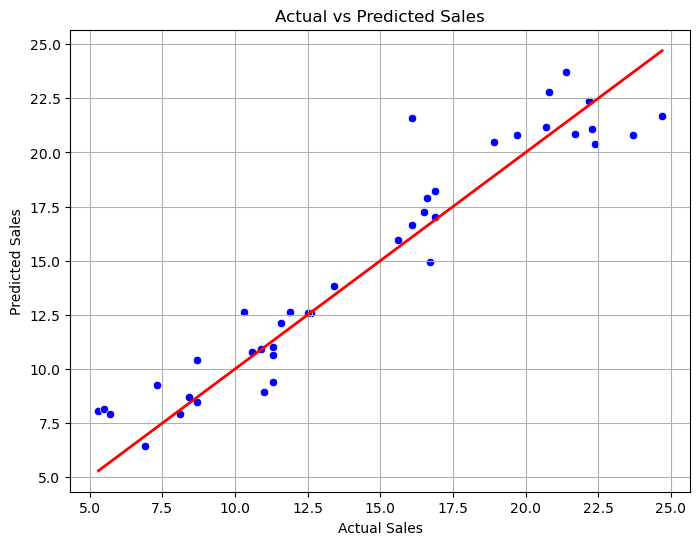

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs predicted sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # line of perfect prediction
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


In [18]:
# Getting the coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(feature_importance)


     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


Text(0.5, 1.0, 'Residual Distribution')

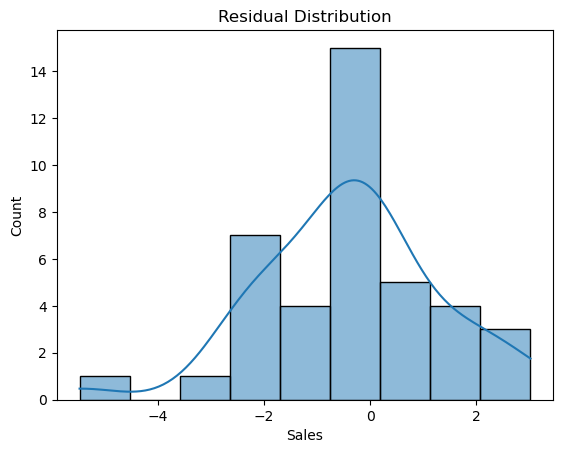

In [19]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')


In [20]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)


Cross-validated R² scores: [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]


In [21]:
import joblib
joblib.dump(model, 'sales_prediction_model.pkl')



['sales_prediction_model.pkl']

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest R²:", r2_score(y_test, rf_pred))


Random Forest R²: 0.9534827934927883


In [26]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)



In [28]:
X['TV_Radio'] = X['TV'] * X['Radio']
X['TV_Radio']

0       8697.78
1       1748.85
2        789.48
3       6256.95
4       1952.64
         ...   
195      141.34
196      461.58
197     1646.10
198    11911.20
199     1996.06
Name: TV_Radio, Length: 200, dtype: float64

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        4.78864000e+03, 6.01886376e+05, 7.56513769e+07],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        2.03401000e+03, 7.88731350e+04, 3.05847632e+06],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        4.80249000e+03, 5.47109640e+04, 6.23278670e+05],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        4.09600000e+01, 1.05350400e+04, 2.70964521e+06],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        4.38244000e+03, 7.88521440e+05, 1.41876685e+08],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        7.56900000e+01, 1.73657220e+04, 3.98425552e+06]])

<Axes: >

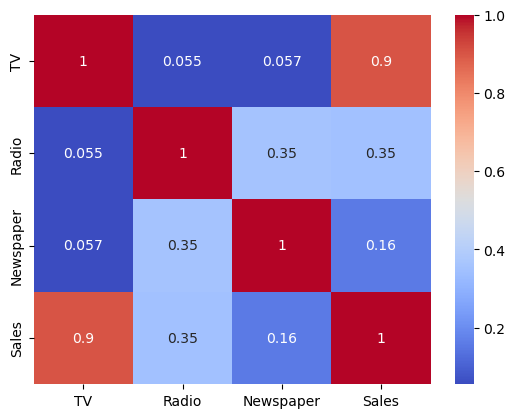

In [30]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
